In [9]:
import mlflow
from mlflow.entities import ViewType
import seaborn as sns
from IPython.display import Image, display

In [10]:
mlflow.get_registry_uri()

'https://mlflow-uvl.ifi.uni-heidelberg.de'

In [11]:
five_thirty_eight = [
    "#30a2da",
    "#fc4f30",
    "#e5ae38",
    "#6d904f",
    "#8b8b8b",
]

sns.set_palette(five_thirty_eight)

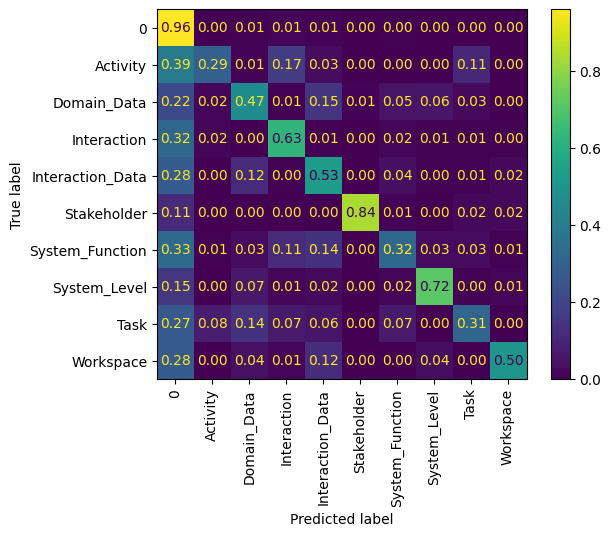

b7e9677af5b4404a9e15918e24efa610
   Mean Recall  Mean Precision        F1  Selected
0     0.557115        0.640319  0.595826      True


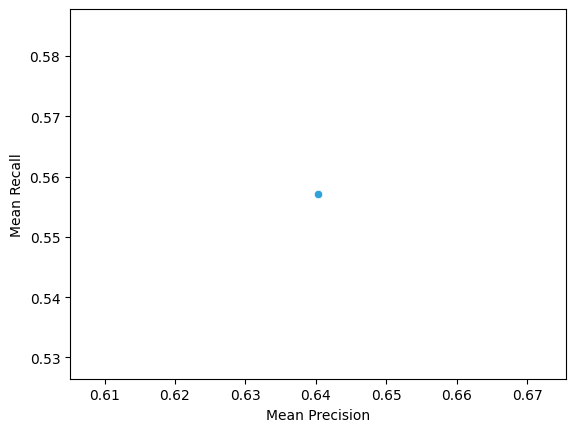

In [5]:
experiment = mlflow.get_experiment_by_name("v2_E2E_SNER_Sweep")
runs = mlflow.search_runs(
    experiment_ids=experiment.experiment_id,
    run_view_type=ViewType.ACTIVE_ONLY,
    output_format="pandas",
)
dataset_all_runs = runs[runs["params.experiment.dataset"].isin(["all"])]
presentation_dataset = dataset_all_runs.copy()[
    [
        "metrics.mean_recall",
        "metrics.mean_precision",
    ]
]
presentation_dataset.rename(
    columns={
        "metrics.mean_recall": "Mean Recall",
        "metrics.mean_precision": "Mean Precision",
    },
    inplace=True,
)


presentation_dataset["F1"] = (
    2
    * presentation_dataset["Mean Precision"]
    * presentation_dataset["Mean Recall"]
) / (
    presentation_dataset["Mean Precision"]
    + presentation_dataset["Mean Recall"]
)
presentation_dataset.sort_values(by="F1", ascending=False, inplace=True)
presentation_dataset["Selected"] = False
presentation_dataset.iloc[
    0, presentation_dataset.columns.get_loc("Selected")
] = True
presentation_dataset.sort_values(by="F1", ascending=True, inplace=True)

fg = sns.scatterplot(
    data=presentation_dataset,
    x="Mean Precision",
    y="Mean Recall",
)
selected_run = dataset_all_runs.loc[presentation_dataset["Selected"] == True]
run_id = selected_run["run_id"].values[0]
path = mlflow.artifacts.download_artifacts(
    run_id=run_id, artifact_path="confusion_matrix.png"
)
display(Image(filename=path))

print(run_id)

best_sner = presentation_dataset.loc[presentation_dataset["Selected"] == True]

print(best_sner)

/Users/bockstaller/code/uvl-tore-classifier-bert/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


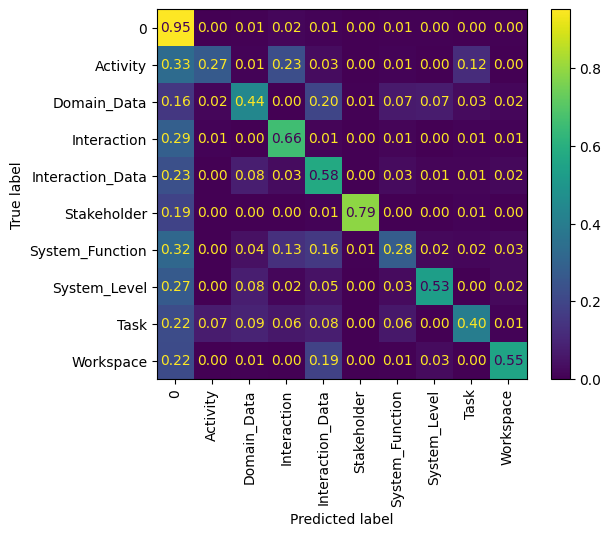

b4b10d236c404cb9b002a325aeb77c34
   Batch Size Learning Rate  Mean Recall  Mean Precision Weighted Classes  \
51         32         0.006      0.54574        0.609963            False   

    Number of Epochs        F1  Selected  
51                12  0.576067      True  


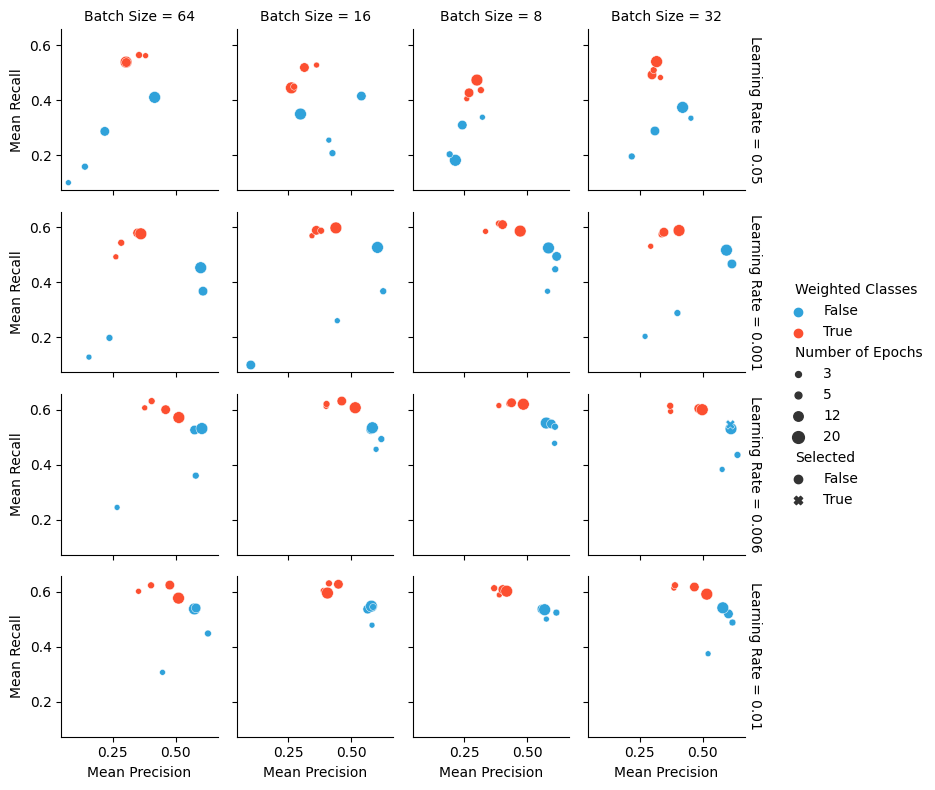

In [6]:
experiment = mlflow.get_experiment_by_name("v2_E2E_BiLSTM_Sweep")
runs = mlflow.search_runs(
    experiment_ids=experiment.experiment_id,
    run_view_type=ViewType.ACTIVE_ONLY,
    output_format="pandas",
)
dataset_all_runs = runs[runs["params.experiment.dataset"].isin(["all"])]
presentation_dataset = dataset_all_runs.copy()[
    [
        "params.bilstm.batch_size",
        "params.bilstm.learning_rate",
        "metrics.mean_recall",
        "metrics.mean_precision",
        "params.bilstm.weighted_classes",
        "params.bilstm.number_epochs",
    ]
]
presentation_dataset.rename(
    columns={
        "params.bilstm.batch_size": "Batch Size",
        "params.bilstm.learning_rate": "Learning Rate",
        "metrics.mean_recall": "Mean Recall",
        "metrics.mean_precision": "Mean Precision",
        "params.bilstm.weighted_classes": "Weighted Classes",
        "params.bilstm.number_epochs": "Number of Epochs",
    },
    inplace=True,
)
presentation_dataset["Number of Epochs"] = presentation_dataset[
    "Number of Epochs"
].astype("int32")

presentation_dataset["F1"] = (
    2
    * presentation_dataset["Mean Precision"]
    * presentation_dataset["Mean Recall"]
) / (
    presentation_dataset["Mean Precision"]
    + presentation_dataset["Mean Recall"]
)
presentation_dataset.sort_values(by="F1", ascending=False, inplace=True)
presentation_dataset["Selected"] = False
presentation_dataset.iloc[
    0, presentation_dataset.columns.get_loc("Selected")
] = True
presentation_dataset.sort_values(by="F1", ascending=True, inplace=True)

fg = sns.relplot(
    data=presentation_dataset,
    x="Mean Precision",
    y="Mean Recall",
    col="Batch Size",
    row="Learning Rate",
    hue="Weighted Classes",
    size="Number of Epochs",
    style="Selected",
    facet_kws={"margin_titles": True},
    height=2,
    kind="scatter",
)
selected_run = dataset_all_runs.loc[presentation_dataset["Selected"] == True]
run_id = selected_run["run_id"].values[0]
path = mlflow.artifacts.download_artifacts(
    run_id=run_id, artifact_path="confusion_matrix.png"
)
display(Image(filename=path))

print(run_id)

best_bilstm = presentation_dataset.loc[
    presentation_dataset["Selected"] == True
]

print(best_bilstm)

In [7]:
experiment = mlflow.get_experiment_by_name("v2_E2E_Bert_Parameter_Sweep")
runs = mlflow.search_runs(
    experiment_ids=experiment.experiment_id,
    run_view_type=ViewType.ACTIVE_ONLY,
    output_format="pandas",
)
dataset_all_runs = runs[runs["params.experiment.dataset"].isin(["all"])]
presentation_dataset = dataset_all_runs.copy()[
    [
        "params.bert.number_epochs",
        "params.bert.train_batch_size",
        "params.bert.learning_rate_bert",
        "params.bert.learning_rate_classifier",
        "params.bert.weight_decay",
        "params.bert.weighted_classes",
        "metrics.mean_recall",
        "metrics.mean_precision",
    ]
]
presentation_dataset.rename(
    columns={
        "params.bert.number_epochs": "Number of Epochs",
        "params.bert.train_batch_size": "Train Batch Size",
        "params.bert.learning_rate_bert": "LR BERT",
        "params.bert.learning_rate_classifier": "LR Classifier",
        "params.bert.weighted_classes": "Weighted Classes",
        "params.bert.weight_decay": "Weight Decay",
        "metrics.mean_recall": "Mean Recall",
        "metrics.mean_precision": "Mean Precision",
    },
    inplace=True,
)
presentation_dataset["Number of Epochs"] = presentation_dataset[
    "Number of Epochs"
].astype("int32")
presentation_dataset["Weight Decay"] = presentation_dataset[
    "Weight Decay"
].astype("float32")


presentation_dataset["F1"] = (
    2
    * presentation_dataset["Mean Precision"]
    * presentation_dataset["Mean Recall"]
) / (
    presentation_dataset["Mean Precision"]
    + presentation_dataset["Mean Recall"]
)
presentation_dataset.sort_values(by="F1", ascending=False, inplace=True)
presentation_dataset["Selected"] = False
presentation_dataset.iloc[
    0, presentation_dataset.columns.get_loc("Selected")
] = True
presentation_dataset.sort_values(by="F1", ascending=True, inplace=True)

fg = sns.relplot(
    data=presentation_dataset,
    x="Mean Precision",
    y="Mean Recall",
    col="Train Batch Size",
    row="LR BERT",
    hue="LR Classifier",
    size="Weight Decay",
    style="Selected",
    facet_kws={"margin_titles": True},
    height=2,
    kind="scatter",
)
fg.set(ylim=(0, 1))
fg.set(xlim=(0, 1))
selected_run = dataset_all_runs.loc[presentation_dataset["Selected"] == True]
run_id = selected_run["run_id"].values[0]
path = mlflow.artifacts.download_artifacts(
    run_id=run_id, artifact_path="confusion_matrix.png"
)
display(Image(filename=path))

print(run_id)

best_bert = presentation_dataset.loc[presentation_dataset["Selected"] == True]

print(best_bert)

AttributeError: 'NoneType' object has no attribute 'experiment_id'

In [8]:
print(best_sner)

   Mean Recall  Mean Precision        F1  Selected
0     0.557115        0.640319  0.595826      True


In [9]:
print(best_bilstm)

   Batch Size Learning Rate  Mean Recall  Mean Precision Weighted Classes  \
51         32         0.006      0.54574        0.609963            False   

    Number of Epochs        F1  Selected  
51                12  0.576067      True  


In [1]:
print(best_bert)

NameError: name 'best_bert' is not defined

In [13]:
experiment = mlflow.get_experiment_by_name("v2_E2E_Roberta_Parameter_Sweep")
runs = mlflow.search_runs(
    experiment_ids=experiment.experiment_id,
    run_view_type=ViewType.ACTIVE_ONLY,
    output_format="pandas",
)
dataset_all_runs = runs[runs["params.experiment.dataset"].isin(["all"])]
presentation_dataset = dataset_all_runs.copy()[
    [
        "params.roberta.number_epochs",
        "params.roberta.train_batch_size",
        "params.roberta.learning_rate_roberta",
        "params.roberta.learning_rate_classifier",
        "params.roberta.weight_decay",
        "params.roberta.weighted_classes",
        "metrics.mean_recall",
        "metrics.mean_precision",
    ]
]
presentation_dataset.rename(
    columns={
        "params.roberta.number_epochs": "Number of Epochs",
        "params.roberta.train_batch_size": "Train Batch Size",
        "params.roberta.learning_rate_roberta": "LR RoBERTa",
        "params.roberta.learning_rate_classifier": "LR Classifier",
        "params.roberta.weighted_classes": "Weighted Classes",
        "params.roberta.weight_decay": "Weight Decay",
        "metrics.mean_recall": "Mean Recall",
        "metrics.mean_precision": "Mean Precision",
    },
    inplace=True,
)
presentation_dataset["Number of Epochs"] = presentation_dataset[
    "Number of Epochs"
].astype("int32")
presentation_dataset["Weight Decay"] = presentation_dataset[
    "Weight Decay"
].astype("float32")


presentation_dataset["F1"] = (
                                 2
                                 * presentation_dataset["Mean Precision"]
                                 * presentation_dataset["Mean Recall"]
                             ) / (
                                 presentation_dataset["Mean Precision"]
                                 + presentation_dataset["Mean Recall"]
                             )
presentation_dataset.sort_values(by="F1", ascending=False, inplace=True)
presentation_dataset["Selected"] = False
presentation_dataset.iloc[
    0, presentation_dataset.columns.get_loc("Selected")
] = True
presentation_dataset.sort_values(by="F1", ascending=True, inplace=True)

fg = sns.relplot(
    data=presentation_dataset,
    x="Mean Precision",
    y="Mean Recall",
    col="Train Batch Size",
    row="LR RoBERTa",
    hue="LR Classifier",
    size="Weight Decay",
    style="Selected",
    facet_kws={"margin_titles": True},
    height=2,
    kind="scatter",
)
fg.set(ylim=(0, 1))
fg.set(xlim=(0, 1))
selected_run = dataset_all_runs.loc[presentation_dataset["Selected"] == True]
run_id = selected_run["run_id"].values[0]
path = mlflow.artifacts.download_artifacts(
    run_id=run_id, artifact_path="confusion_matrix.png"
)
display(Image(filename=path))

print(run_id)

best_roberta = presentation_dataset.loc[presentation_dataset["Selected"] == True]

print(best_roberta)

KeyError: 'params.experiment.dataset'